# Аугументация Изображений наночастиц

**Гауссово размытие (Gaussian Blur)**:
Этот вид аугментации добавляет случайное размытие изображения с использованием гауссовой функции. (0.0, 3.0) определяет диапазон значений для параметра размытия, где 0.0 означает отсутствие размытия, а 3.0 - максимальное размытие. Таким образом, это применяет размытие с разной степенью интенсивности к изображениям.

**Отражение по горизонтали и вертикали (Fliplr и Flipud**):
Данные операции создают зеркальные отражения изображений по горизонтали и вертикали соответственно.

**Аффинное преобразование (Affine)**:
 Эта операция выполняет аффинное преобразование изображения, включая перемещение (translate), вращение (rotate) и масштабирование (scale).

**Умножение (Multiply)**:
Этот метод множит каждый пиксель изображения на случайное число из указанного диапазона, что изменяет яркость изображения.

**Линейный контраст (Linear Contrast)**:
Эта операция регулирует контраст изображения, умножая значения пикселей на случайный коэффициент из указанного диапазона.

In [ ]:
!pip install imgaug

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


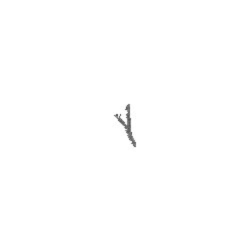

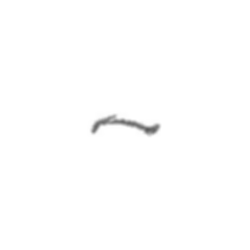

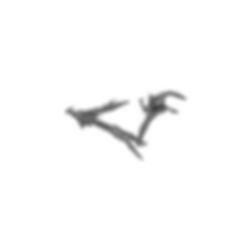

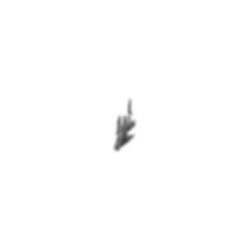

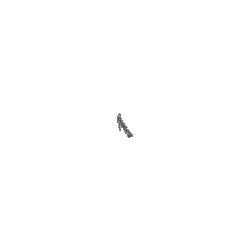

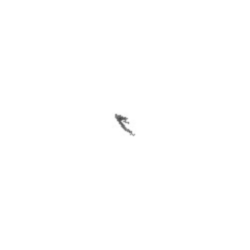

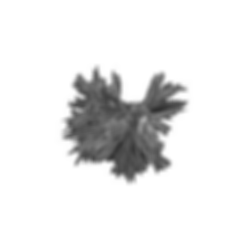

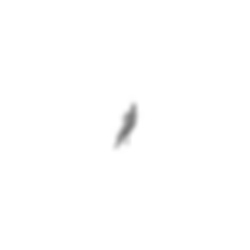

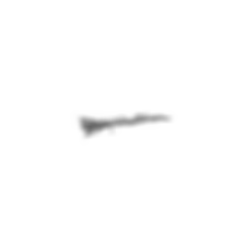

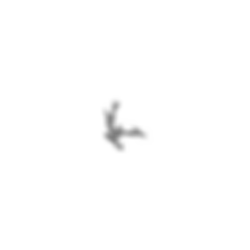

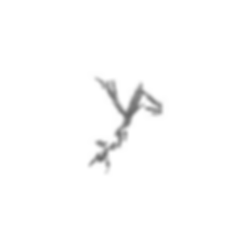

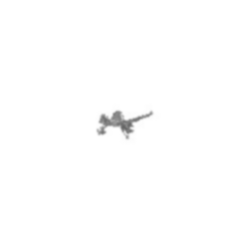

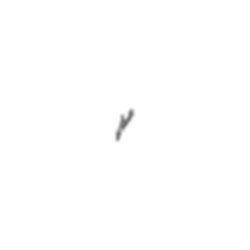

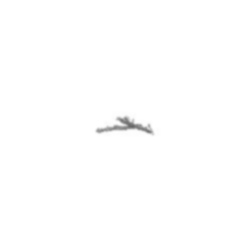

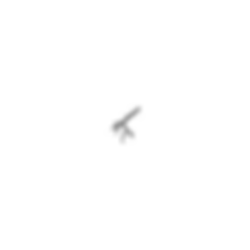

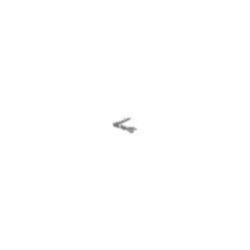

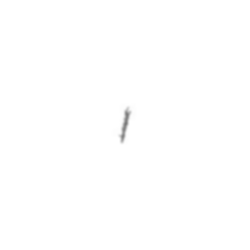

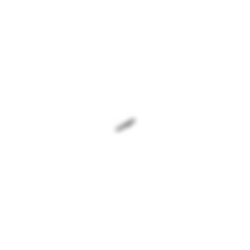

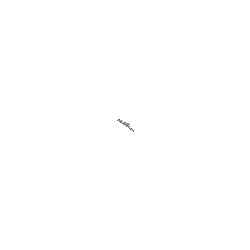

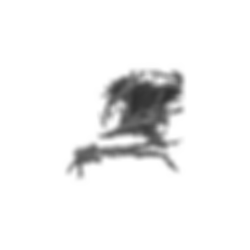

In [ ]:
import imgaug.augmenters as iaa
import cv2
import glob
from google.colab.patches import cv2_imshow

# Load the images
images = []
images_path = glob.glob("/content/drive/MyDrive/Палочки/*.jpg")
for img_path in images_path:
    img = cv2.imread(img_path)
    images.append(img)

# Define augmentation operations
augmentation = iaa.Sequential([
    # 1. Flip
    #iaa.Fliplr(0.5),
    #iaa.Flipud(0.5),

    # 2. Affine
    #iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
               #rotate=(-30, 30),
               #scale=(0.5, 1.5)),
    # 3. Multiply
    #iaa.Multiply((0.8, 1.2)),
    # 4. Linear contrast
    #iaa.LinearContrast((0.6, 1.4)),
    # Perform methods below only sometimes
    iaa.Sometimes(1.0,
        # 5. Gaussian Blur
        iaa.GaussianBlur((0.0, 3.0)))])


# Generate augmented images
augmented_images = augmentation(images=images)

# Display augmented images
for img in augmented_images:
    cv2_imshow(img)

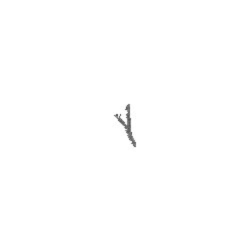

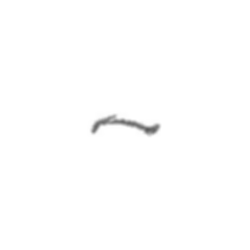

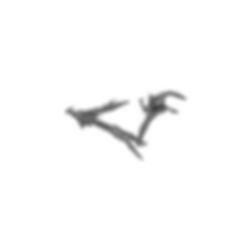

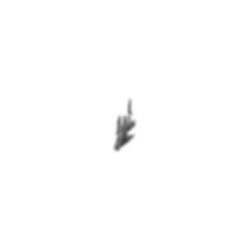

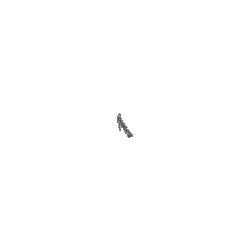

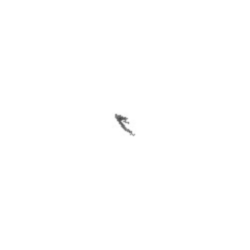

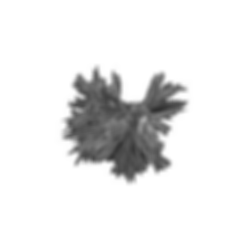

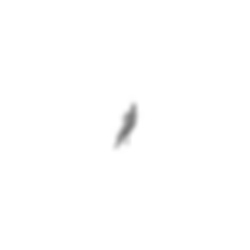

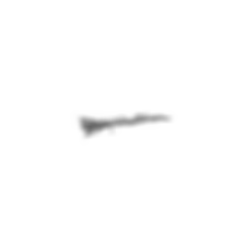

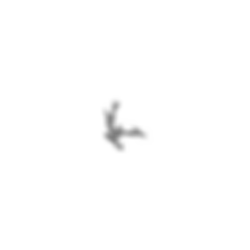

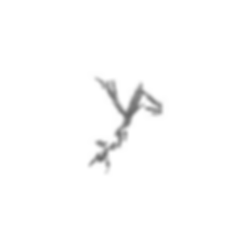

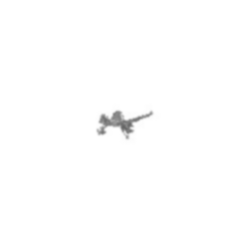

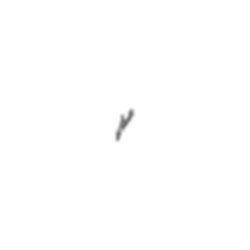

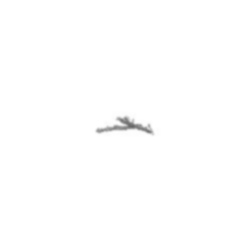

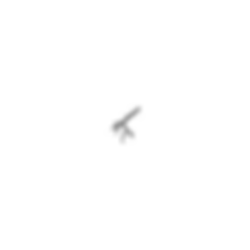

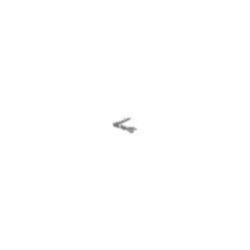

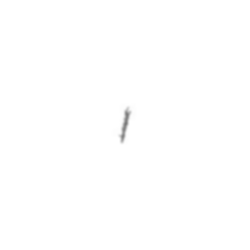

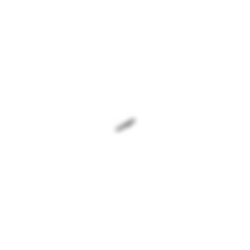

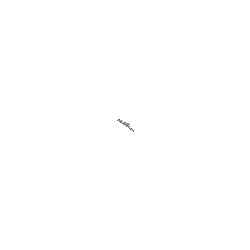

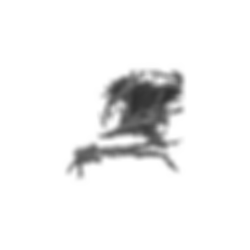

Augmented images saved to /content/drive/MyDrive/П1_AugmentedImages/


In [ ]:
import imgaug.augmenters as iaa
import cv2
import glob
from google.colab.patches import cv2_imshow
import os

# Load the images
images = []
images_path = glob.glob("/content/drive/MyDrive/Палочки/*.jpg")
for img_path in images_path:
    img = cv2.imread(img_path)
    images.append(img)

augmentation = iaa.Sequential([
    # 1. Flip
    #iaa.Fliplr(0.5),
    #iaa.Flipud(0.5),

    # 2. Affine
    #iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
               #rotate=(-30, 30),
               #scale=(0.5, 1.5))
    # 3. Multiply
    #iaa.Multiply((0.8, 1.2)),
    # 4. Linear contrast
    #iaa.LinearContrast((0.6, 1.4)),
    # Perform methods below only sometimes
    iaa.Sometimes(1.0,
        # 5. Gaussian Blur
        iaa.GaussianBlur((0.0, 3.0)))])


# Create a directory to save the augmented images
output_directory = "/content/drive/MyDrive/П1_AugmentedImages/"
os.makedirs(output_directory, exist_ok=True)



# Generate augmented images and save them
for idx, img in enumerate(augmented_images):
    augmented_image = augmentation(image=img)
    output_path = os.path.join(output_directory, f"П__{idx}.jpg")
    cv2.imwrite(output_path, augmented_image)

# Display augmented images
for img in augmented_images:
    cv2_imshow(img)

print(f"Augmented images saved to {output_directory}")